In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from statsmodels.graphics.tsaplots import plot_pacf

from darkgreybox.model import TiTe
from darkgreybox.fit import train_models

2020-10-13 11:35:48,934 darkgreybox  INFO     Logging enabled...


In [2]:
# the duration of a record
rec_duration = 1 # hour

In [3]:
train_df = pd.read_csv('./data/demo_data.csv', index_col=0, parse_dates=True)

input_X = train_df[['Ph', 'Ta', 'Th']]
input_y = train_df['Ti']

input_X['Ti0'] = input_y
input_X['Th0'] = input_y
input_X['Te0'] = input_y - 2 

print(f'Input X shape: {input_X.shape}, input y shape: {input_y.shape}')

Input X shape: (792, 6), input y shape: (792,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(input_X, input_y, test_size=5 / 33, shuffle=False)

print(f'Train: X shape: {X_train.shape}, y shape: {y_train.shape}')
print(f'Test: X shape: {X_test.shape}, y shape: {y_test.shape}')

Train: X shape: (672, 6), y shape: (672,)
Test: X shape: (120, 6), y shape: (120,)


In [5]:
train_params = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Te0': {'value': X_train.iloc[0]['Te0'], 'vary': True, 'min': 10, 'max': 25},
    'Ci': {'value': 1},
    'Ce': {'value': 1},
    'Rie': {'value': 1},
    'Rea': {'value': 1},
}

In [6]:
prefit_df = train_models(models=[TiTe(train_params, rec_duration=1)],
                         X_train=X_train, 
                         y_train=y_train, 
                         splits=KFold(n_splits=int(len(X_train) / 24), shuffle=False).split(X_train), 
                         error_metric=mean_squared_error,
                         method='nelder', 
                         n_jobs=-1, 
                         verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:   25.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   28.5s finished


In [7]:
prefit_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2019-12-23 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd62e372e10>,<darkgreybox.model.DarkGreyModelResult object ...,0.802357,nelder,1.483176e+02
1,2019-12-24 00:00:00+00:00,2019-12-24 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323d5250>,<darkgreybox.model.DarkGreyModelResult object ...,1.301430,nelder,1.889148e-02
2,2019-12-25 00:00:00+00:00,2019-12-25 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323e0510>,<darkgreybox.model.DarkGreyModelResult object ...,5.023719,nelder,4.929406e-02
3,2019-12-26 00:00:00+00:00,2019-12-26 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323d5fd0>,<darkgreybox.model.DarkGreyModelResult object ...,1.817629,nelder,1.701261e-03
4,2019-12-27 00:00:00+00:00,2019-12-27 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323e0e10>,<darkgreybox.model.DarkGreyModelResult object ...,2.349723,nelder,1.672513e-03
5,2019-12-28 00:00:00+00:00,2019-12-28 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323ed310>,<darkgreybox.model.DarkGreyModelResult object ...,5.024828,nelder,6.865798e-01
6,2019-12-29 00:00:00+00:00,2019-12-29 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323f0450>,<darkgreybox.model.DarkGreyModelResult object ...,5.099921,nelder,3.671860e-02
7,2019-12-30 00:00:00+00:00,2019-12-30 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323f0b90>,<darkgreybox.model.DarkGreyModelResult object ...,4.894734,nelder,1.309913e+14
8,2019-12-31 00:00:00+00:00,2019-12-31 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323ed3d0>,<darkgreybox.model.DarkGreyModelResult object ...,0.894828,nelder,3.184097e-04
9,2020-01-01 00:00:00+00:00,2020-01-01 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323fddd0>,<darkgreybox.model.DarkGreyModelResult object ...,5.037697,nelder,2.977304e+12


In [8]:
train_df = train_models(models=prefit_df['model'],
                        X_train=X_train, 
                        y_train=y_train, 
                        splits=None, 
                        error_metric=mean_squared_error,
                        method='nelder', 
                        n_jobs=-1, 
                        verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:  2.3min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  2.5min finished


In [9]:
train_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.028982,nelder,NaN
1,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.924627,nelder,NaN
2,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.692387,nelder,NaN
3,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.106686,nelder,NaN
4,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.856270,nelder,NaN
5,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.216695,nelder,NaN
6,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.859102,nelder,NaN
7,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd63229cb50>,<darkgreybox.model.DarkGreyModelResult object ...,70.309815,nelder,inf
8,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.240818,nelder,NaN
9,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTe object at 0x7fd6323fc750>,<darkgreybox.model.DarkGreyModelResult object ...,68.641586,nelder,inf


In [13]:
model = train_df.loc[12, 'model']
train_results = train_df.loc[12, 'model_result']

model.result.params

name,value,standard error,relative error,initial value,min,max,vary
Ti0,18.1375000,0.00000000,(0.00%),18.1375,-inf,inf,False
Te0,16.8310429,0.11092049,(0.66%),16.1375,10.0000000,25.0000000,True
Ci,184.890745,5.21619702,(2.82%),181.53435163671958,-inf,inf,True
Ce,483.231444,15.3415697,(3.17%),199.01636563913877,-inf,inf,True
Rie,0.11119563,0.00451638,(4.06%),0.5237794087225962,-inf,inf,True
Rea,0.52278053,0.00503121,(0.96%),0.00338136275439081,-inf,inf,True


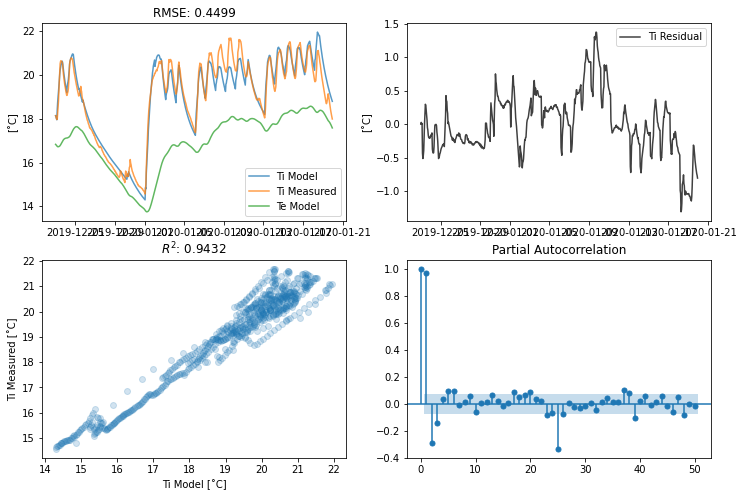

In [16]:
rmse = mean_squared_error(y_train, train_results.Z) ** 0.5
r2 = r2_score(y_train, train_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_train.index, train_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_train, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_train.index, train_results.Te, label='Te Model', alpha=0.75)
ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(train_results.Z, y_train, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_train.index, y_train - train_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_train - train_results.Z, ax=ax[1, 1], lags=50);


In [17]:
test_results = model.predict(X=X_test, ic_params={'Ti0': y_test.iloc[0], 'Te0': train_results.Te[-1]})

/Users/quarentine/.virtualenvs/darkgreybox/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


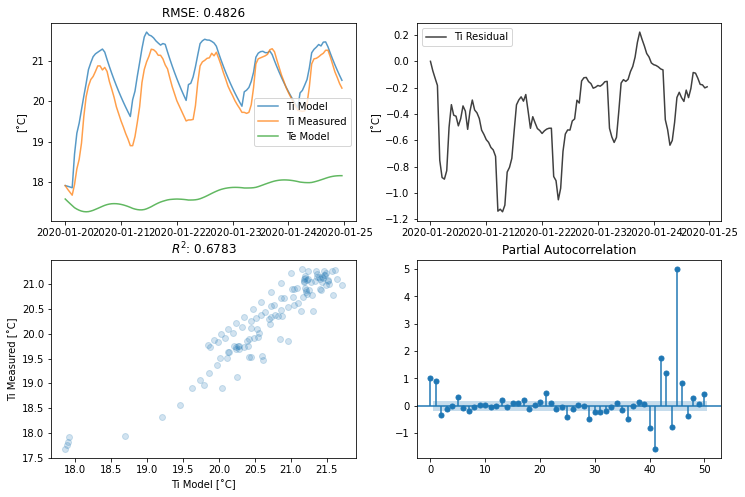

In [21]:
rmse = mean_squared_error(y_test, test_results.Z) ** 0.5
r2 = r2_score(y_test, test_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_test.index, test_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_test, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_test.index, test_results.Te, label='Te Model', alpha=0.75)

ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(test_results.Z, y_test, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_test.index, y_test - test_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_test - test_results.Z, ax=ax[1, 1], lags=50);
